# Iris Dataset Visualization

## The Iris Dataset contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other. 

### Attribute Information:
- sepal length in $cm$ 
- sepal width in $cm$ 
- petal length in $cm$ 
- petal width in $cm$ 
- class: Iris Setosa / Iris Versicolour / Iris Virginica

### First, import all the related Python libraries, including PCA and Kernel PCA built-in functions in sklearn. Also loading Iris Dataset to Python Notebook

In [1]:
from sklearn.decomposition import PCA, KernelPCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
from itertools import cycle
import pylab as pl
import numpy as np
%matplotlib inline

# Load Data
iris = load_iris()

### Second, we perform Linear PCA on the Iris Dataset with only keeping two principal components

In [2]:
X = iris.data


# Center the data to the mean
X_scaled = preprocessing.scale(X, with_std=False)


# Perform Linear PCA on it, keeping only 2 principal components for plotting
pca = PCA(n_components=3).fit(X_scaled)
X_pca = pca.transform(X_scaled)

#### Have a glimpse of principal components of the result of Linear PCA

In [3]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


#### Now, plot the result via Linear PCA

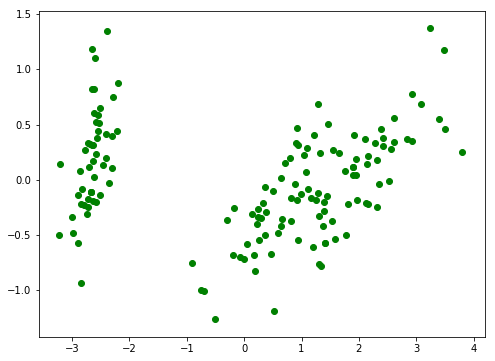

In [4]:
plt.figure(figsize=(8, 6))

for pc in X_pca:
    plt.scatter(pc[0], pc[1], color='g')
plt.show()


### From the plot above, we can clearly observe that there is a cluster which is obviously linearly separable from the others.

### Third, we perform Kernel PCA on the Iris Dataset. For the parameter (gamma) selection, we intend to perform K-means on the result of what we get. Comparing the sum of squared distances of samples to their closest cluster center, we choose the gamma which gives the optimized sum of squared distances

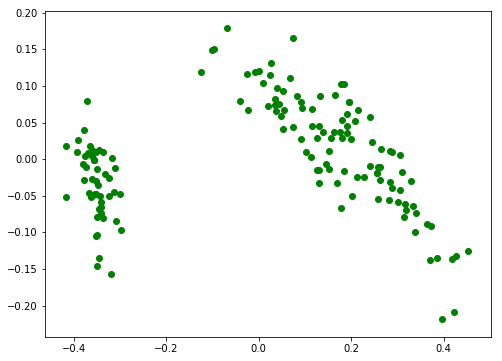

In [9]:
# Perform RBF Kernel
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.01).fit(X_scaled)
X_kpca = kpca.transform(X_scaled)


# Perform Polynomial Kernel
# kpca = KernelPCA(n_components=2, kernel='poly', degree=8).fit(X_scaled)
# X_kpca = kpca.transform(X_scaled)

plt.figure(figsize=(8, 6))

for pc in X_kpca:
    plt.scatter(pc[0], pc[1], color='g')
plt.show()